# Workspace settings

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import print_function
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import sample, randint
batch_size = 1000
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28
channels=1
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Import data

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape= (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Visualize Data


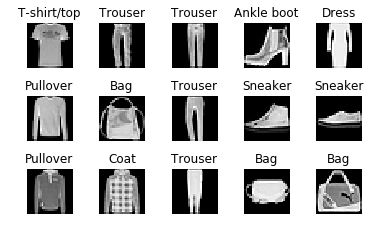

In [0]:
def draw_sample(X, y, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        n=randint(0,x_train.shape[0]-1000)
        plt.subplot(rows, cols, i+1)
        img = X[n+i].reshape(input_shape)
        if not (img.ndim == 2 or img.ndim == 3 and img.shape[-1] in [3, 4]):
          img=img.reshape(img_rows,img_cols)
        plt.imshow(img, cmap='gray' if channels==1 else "gnuplot")
        plt.title("{}".format(class_names[np.argmax(y[n+i])]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

draw_sample(x_train, y_train, 3, 5)

# Make model

In [0]:
model = keras.Sequential(name="FASHION_MNIST_CNN")
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "FASHION_MNIST_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)         

# Run model

In [0]:
H=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.7959 - accuracy: 0.7132 - val_loss: 0.4508 - val_accuracy: 0.8372
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4544 - accuracy: 0.8403 - val_loss: 0.3708 - val_accuracy: 0.8673
Epoch 3/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3816 - accuracy: 0.8663 - val_loss: 0.3313 - val_accuracy: 0.8809
Epoch 4/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3490 - accuracy: 0.8769 - val_loss: 0.3080 - val_accuracy: 0.8895
Epoch 5/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3236 - accuracy: 0.8854 - val_loss: 0.2905 - val_accuracy: 0.8962
Epoch 6/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3037 - accuracy: 0.8929 - val_loss: 0.2812 - val_accuracy: 0.8967
Epoch 7/20
60000/60000 [==============================] 

# Evaluate Model

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21620800716280938
Test accuracy: 0.9224


# Make Predictions

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.89      0.88      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.79      0.74      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



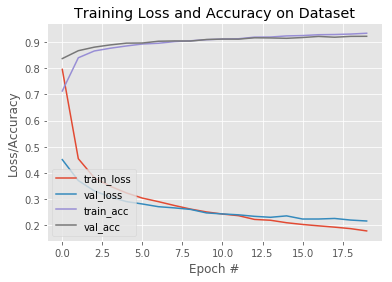

In [0]:
predictions = model.predict(x_test)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
	target_names=class_names))
 
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# Display data

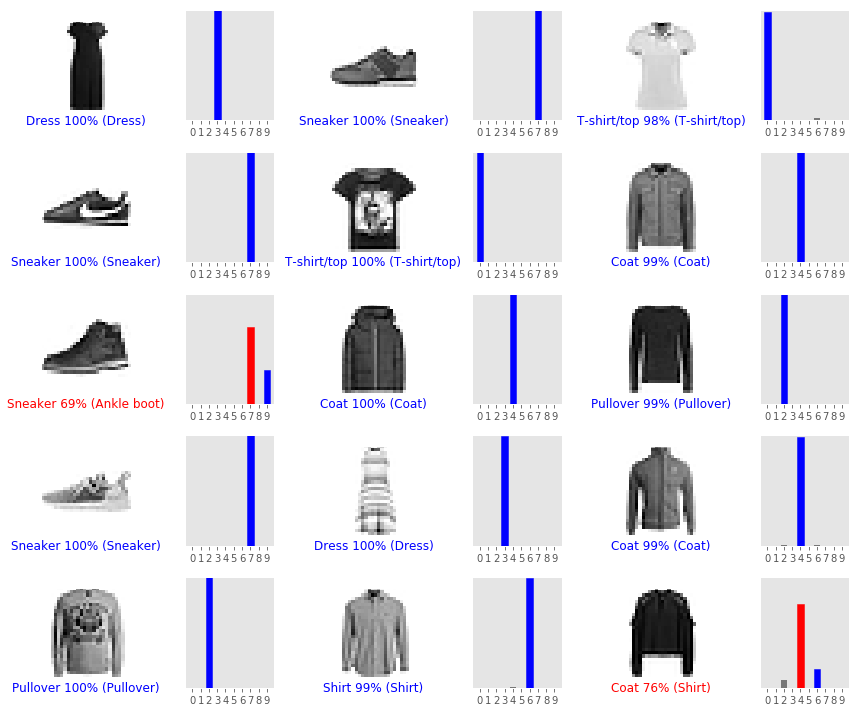

In [0]:
def plot_image(i, predictions_array, true_label, img):
    prediction, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if not (img.ndim == 2 or img.ndim == 3 and img.shape[-1] in [3, 4]):
      img=img.reshape(img_rows,img_cols)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    true_label=np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(prediction),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    prediction, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
index=0
for i in sample(range(x_test.shape[0]), num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * index + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * index + 2)
    plot_value_array(i, predictions, y_test)
    index+=1
plt.tight_layout()
plt.show()
